In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error

In [4]:
df = pd.read_csv('CreditScoring.csv')
df.head()

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


In [5]:
df.shape

(4455, 14)

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Status,4455.0,1.281257e+00,4.501621e-01,0.0,1.0,1.0,2.0,2.0
Seniority,4455.0,7.987205e+00,8.173444e+00,0.0,2.0,5.0,12.0,48.0
Home,4455.0,2.657015e+00,1.610467e+00,0.0,2.0,2.0,4.0,6.0
Time,4455.0,4.644175e+01,1.465523e+01,6.0,36.0,48.0,60.0,72.0
Age,4455.0,3.707767e+01,1.098486e+01,18.0,28.0,36.0,45.0,68.0
Marital,4455.0,1.879012e+00,6.437478e-01,0.0,2.0,2.0,2.0,5.0
Records,4455.0,1.173513e+00,3.787326e-01,1.0,1.0,1.0,1.0,2.0
Job,4455.0,1.675870e+00,9.540352e-01,0.0,1.0,1.0,3.0,4.0
Expenses,4455.0,5.556880e+01,1.951588e+01,35.0,35.0,51.0,72.0,180.0
Income,4455.0,7.633170e+05,8.703625e+06,0.0,80.0,120.0,166.0,99999999.0


In [9]:
df.isnull().sum()/len(df)*100

Status       0.0
Seniority    0.0
Home         0.0
Time         0.0
Age          0.0
Marital      0.0
Records      0.0
Job          0.0
Expenses     0.0
Income       0.0
Assets       0.0
Debt         0.0
Amount       0.0
Price        0.0
dtype: float64

In [10]:
df.duplicated().sum()

2

In [11]:
df.drop_duplicates()

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4450,2,1,1,60,39,2,1,1,69,92,0,0,900,1020
4451,1,22,2,60,46,2,1,1,60,75,3000,600,950,1263
4452,2,0,2,24,37,2,1,2,60,90,3500,0,500,963
4453,1,0,1,48,23,1,1,3,49,140,0,0,550,550


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4455 entries, 0 to 4454
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Status     4455 non-null   int64
 1   Seniority  4455 non-null   int64
 2   Home       4455 non-null   int64
 3   Time       4455 non-null   int64
 4   Age        4455 non-null   int64
 5   Marital    4455 non-null   int64
 6   Records    4455 non-null   int64
 7   Job        4455 non-null   int64
 8   Expenses   4455 non-null   int64
 9   Income     4455 non-null   int64
 10  Assets     4455 non-null   int64
 11  Debt       4455 non-null   int64
 12  Amount     4455 non-null   int64
 13  Price      4455 non-null   int64
dtypes: int64(14)
memory usage: 487.4 KB


Convert values what they represent

In [14]:
df.columns = df.columns.str.lower()

In [15]:
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


In [16]:
status_values = {
    1: 'ok',
    2: 'default',
    3: 'unk'
}

In [17]:
df.status = df.status.map(status_values)
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,1,60,30,2,1,3,73,129,0,0,800,846
1,ok,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,default,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,ok,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,ok,0,1,36,26,1,1,1,46,107,0,0,310,910


In [18]:
home_values = {
    1: 'rent',
    2: 'owner',
    3: 'private',
    4: 'ignore',
    5: 'parents',
    6: 'other',
    0: 'unk'
}
df.home = df.home.map(home_values)

In [19]:
marital_values = {
    1: 'single',
    2: 'married',
    3: 'widow',
    4: 'separated',
    5: 'divorced',
    0: 'unk'
}
df.marital = df.marital.map(marital_values)

In [20]:
record_values = {
    1: 'no',
    2: 'yes',
    3: 'unk'
}
df.records = df.records.map(record_values)

In [21]:
job_values = {
    1: 'fixed',
    2: 'partime',
    3: 'freelance',
    4: 'other',
    0: 'unk'
}
df.job = df.job.map(job_values)

In [22]:
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129,0,0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107,0,0,310,910


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4455 entries, 0 to 4454
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   status     4454 non-null   object
 1   seniority  4455 non-null   int64 
 2   home       4455 non-null   object
 3   time       4455 non-null   int64 
 4   age        4455 non-null   int64 
 5   marital    4455 non-null   object
 6   records    4455 non-null   object
 7   job        4455 non-null   object
 8   expenses   4455 non-null   int64 
 9   income     4455 non-null   int64 
 10  assets     4455 non-null   int64 
 11  debt       4455 non-null   int64 
 12  amount     4455 non-null   int64 
 13  price      4455 non-null   int64 
dtypes: int64(9), object(5)
memory usage: 487.4+ KB


In [28]:
num_cols = df.select_dtypes(include='number').columns
num_cols

Index(['seniority', 'time', 'age', 'expenses', 'income', 'assets', 'debt',
       'amount', 'price'],
      dtype='object')

In [27]:
cat_cols = df.select_dtypes(include='object').columns
cat_cols

Index(['status', 'home', 'marital', 'records', 'job'], dtype='object')

In [29]:
for i in cat_cols:
    print(df[i].value_counts())
    print("***"*100)

status
ok         3200
default    1254
Name: count, dtype: int64
************************************************************************************************************************************************************************************************************************************************************************************************************
home
owner      2107
rent        973
parents     783
other       319
private     247
ignore       20
unk           6
Name: count, dtype: int64
************************************************************************************************************************************************************************************************************************************************************************************************************
marital
married      3241
single        978
separated     130
widow          67
divorced       38
unk             1
Name: count, dtype: int64
************************************************

EDA

In [31]:
'''for i in num_cols:
    sns.histplot(data=df, x=i, color='red')
    plt.show()
'''

"for i in num_cols:\n    sns.histplot(data=df, x=i, color='red')\n    plt.show()\n"

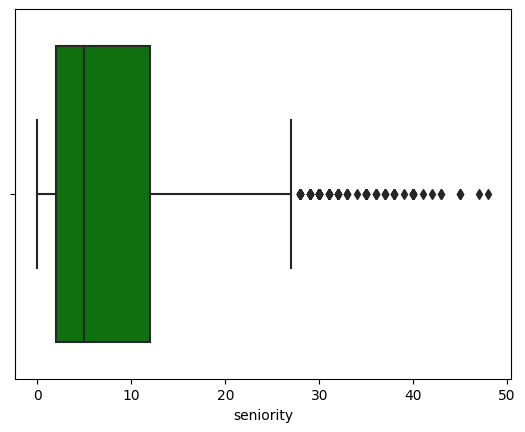

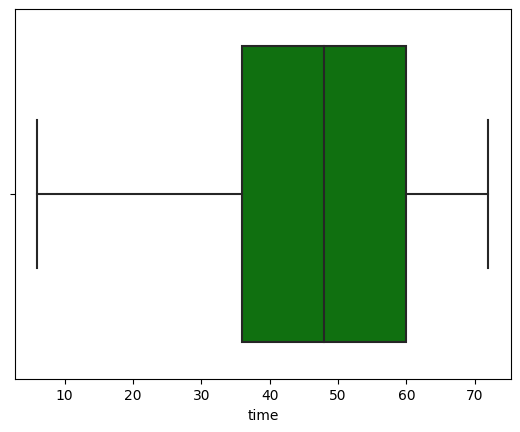

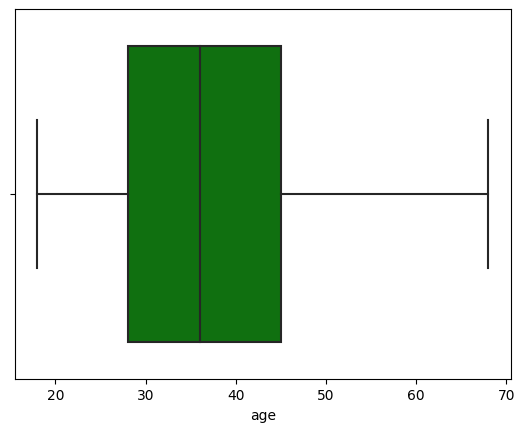

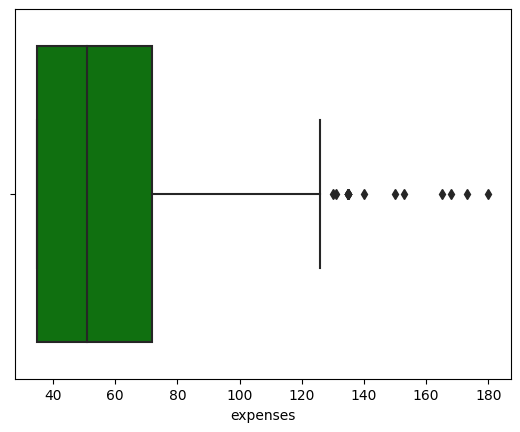

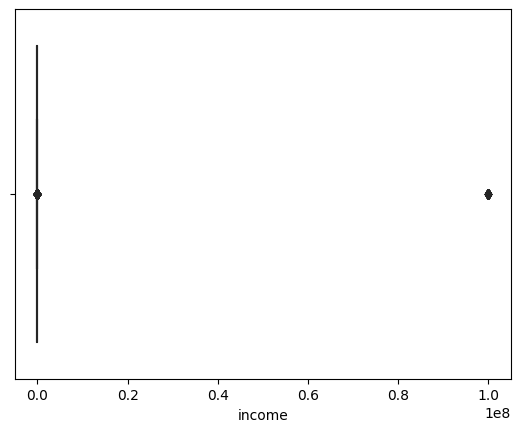

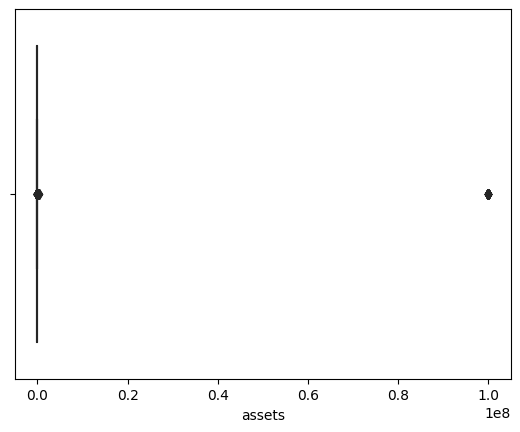

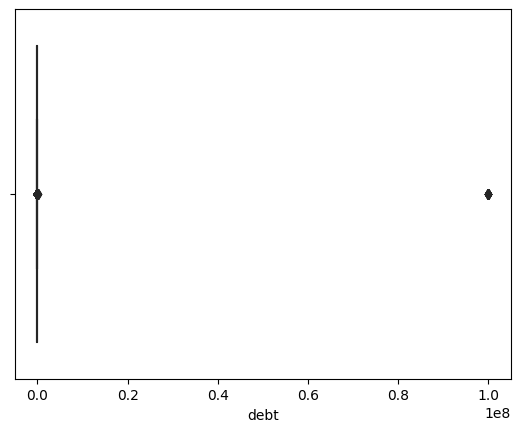

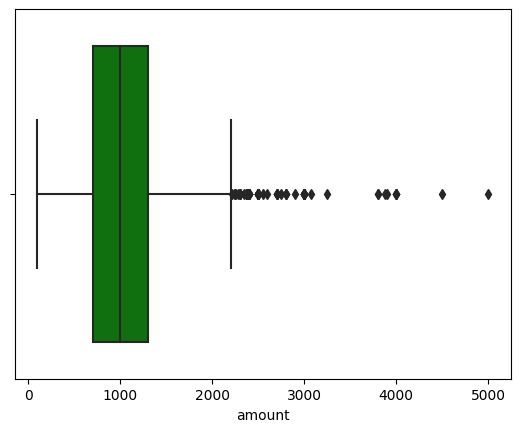

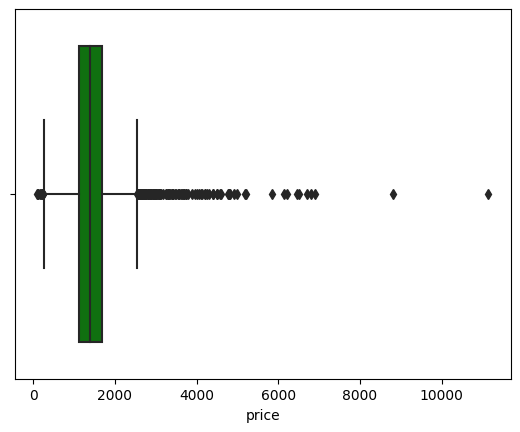

In [32]:
for i in num_cols:
    sns.boxplot(data=df, x = i, color='green')
    plt.show()

Treatment

In [33]:
def wisker(col):
    q1, q3 = np.percentile(col, [25, 75])
    iqr = q3 - q1
    lw = q1 - (1.5)*iqr
    uw = q3 + (1.5)*iqr
    return lw, uw

In [34]:
for i in num_cols:
    lw, uw = wisker(df[i])
    df[i] = np.where(df[i] < lw , lw, df[i])
    df[i] = np.where(df[i] > uw , uw, df[i])

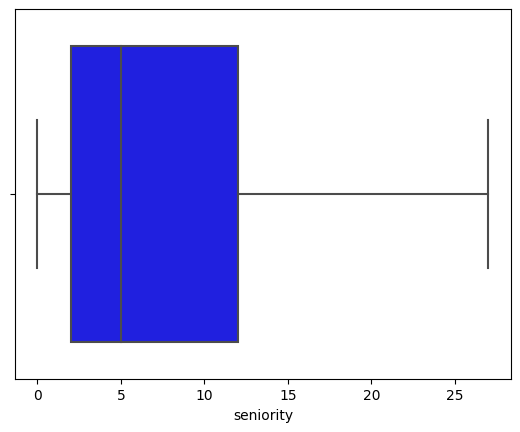

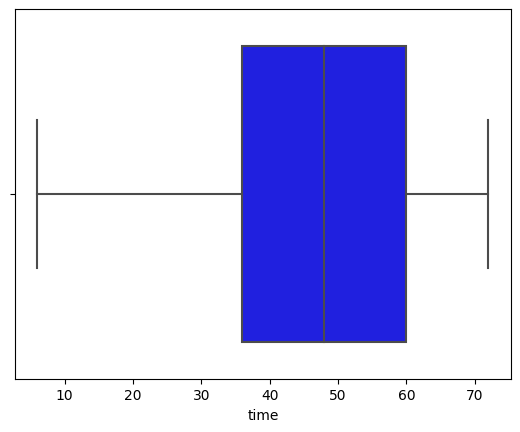

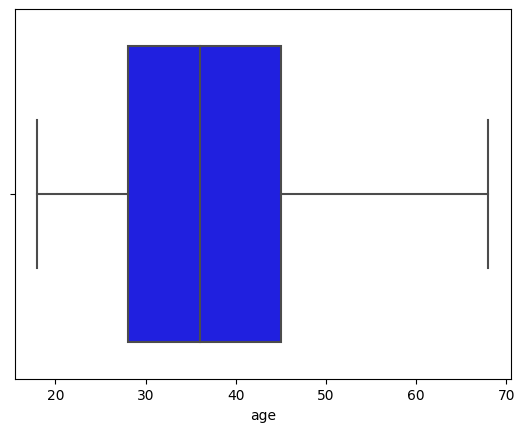

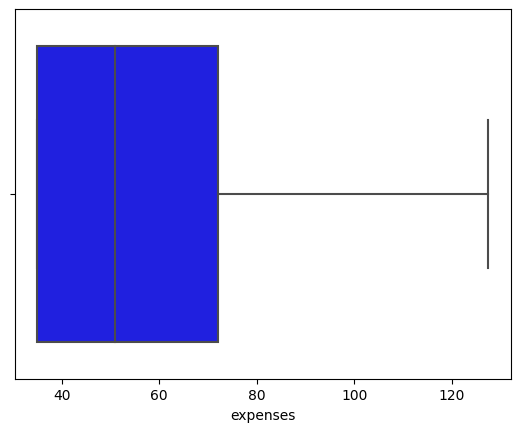

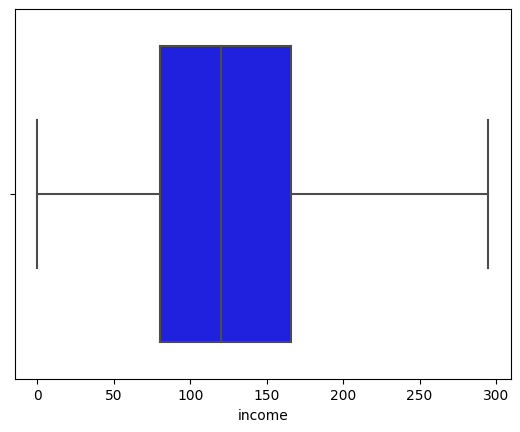

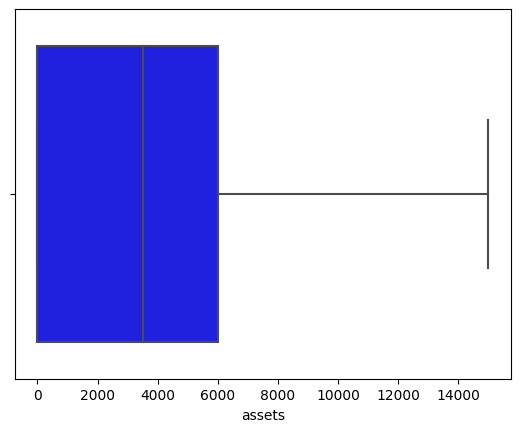

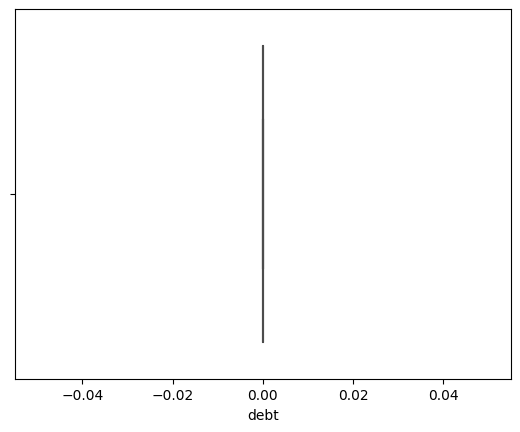

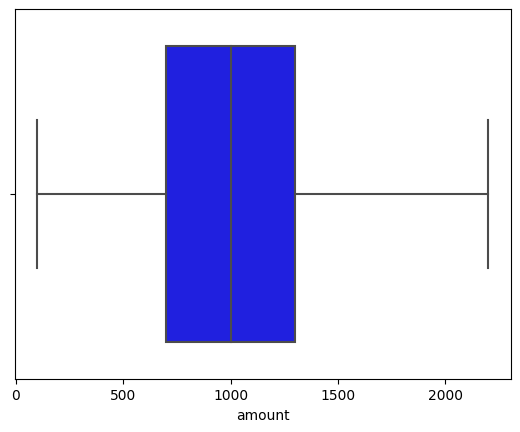

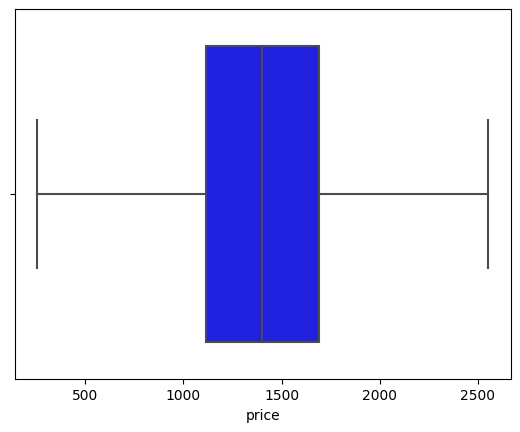

In [35]:
for i in num_cols:
    sns.boxplot(data = df, x = i, color = 'blue')
    plt.show()

numerical and categorical features

In [36]:
num_features = list(num_cols)
num_features

['seniority',
 'time',
 'age',
 'expenses',
 'income',
 'assets',
 'debt',
 'amount',
 'price']

In [37]:
cat_features = list(cat_cols)
cat_features

['status', 'home', 'marital', 'records', 'job']

Pipeline

In [38]:
num_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

In [39]:
cat_pipeline = Pipeline(steps=[
    ('encoder', OneHotEncoder(handle_unknown = 'ignore'))
])

In [40]:
transformer = ColumnTransformer(transformers=[
    ('numerical', num_pipeline, num_features),
    ('categorical', cat_pipeline, cat_features)
])

In [49]:
#data preprocessing
X = transformer.fit_transform(df)
X

array([[ 0.16048988,  0.92525164, -0.64438348, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.21835182,  0.92525164,  1.90486633, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.29272263, -0.71257335,  0.81233069, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.02960479, -1.53148585, -0.00707103, ...,  0.        ,
         1.        ,  0.        ],
       [-1.02960479,  0.10633914, -1.28169594, ...,  0.        ,
         0.        ,  0.        ],
       [-0.36844108,  0.92525164, -0.46229421, ...,  0.        ,
         0.        ,  0.        ]])

Model

Find the optimal number of clusters using the elbow method

C:\Users\bigsh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\bigsh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\bigsh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set

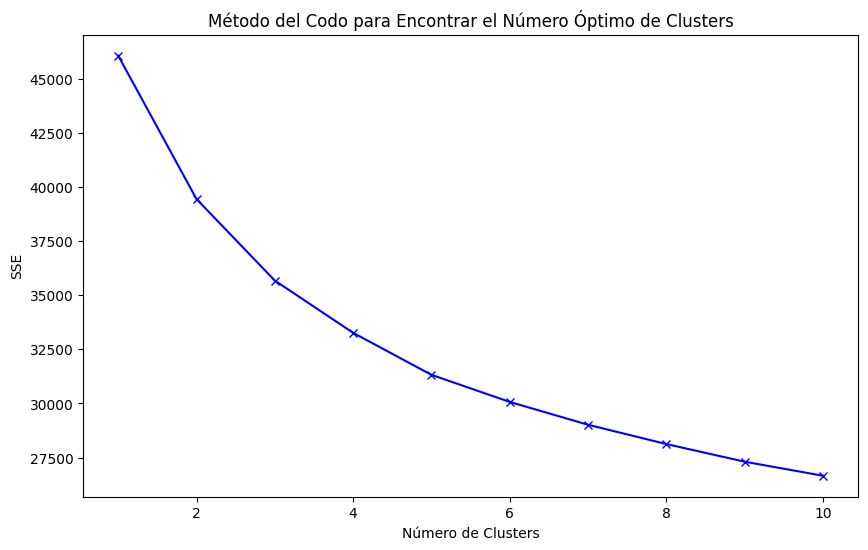

In [50]:
def plot_elbow(X):
    sse = []
    k_range = range(1, 11)
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        sse.append(kmeans.inertia_)
    plt.figure(figsize=(10, 6))
    plt.plot(k_range, sse, 'bx-')
    plt.xlabel('Número de Clusters')
    plt.ylabel('SSE')
    plt.title('Método del Codo para Encontrar el Número Óptimo de Clusters')
    plt.show()

plot_elbow(X)

Training

In [51]:
# Suponiendo que determinamos que 3 clusters es el número óptimo
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(X)

C:\Users\bigsh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


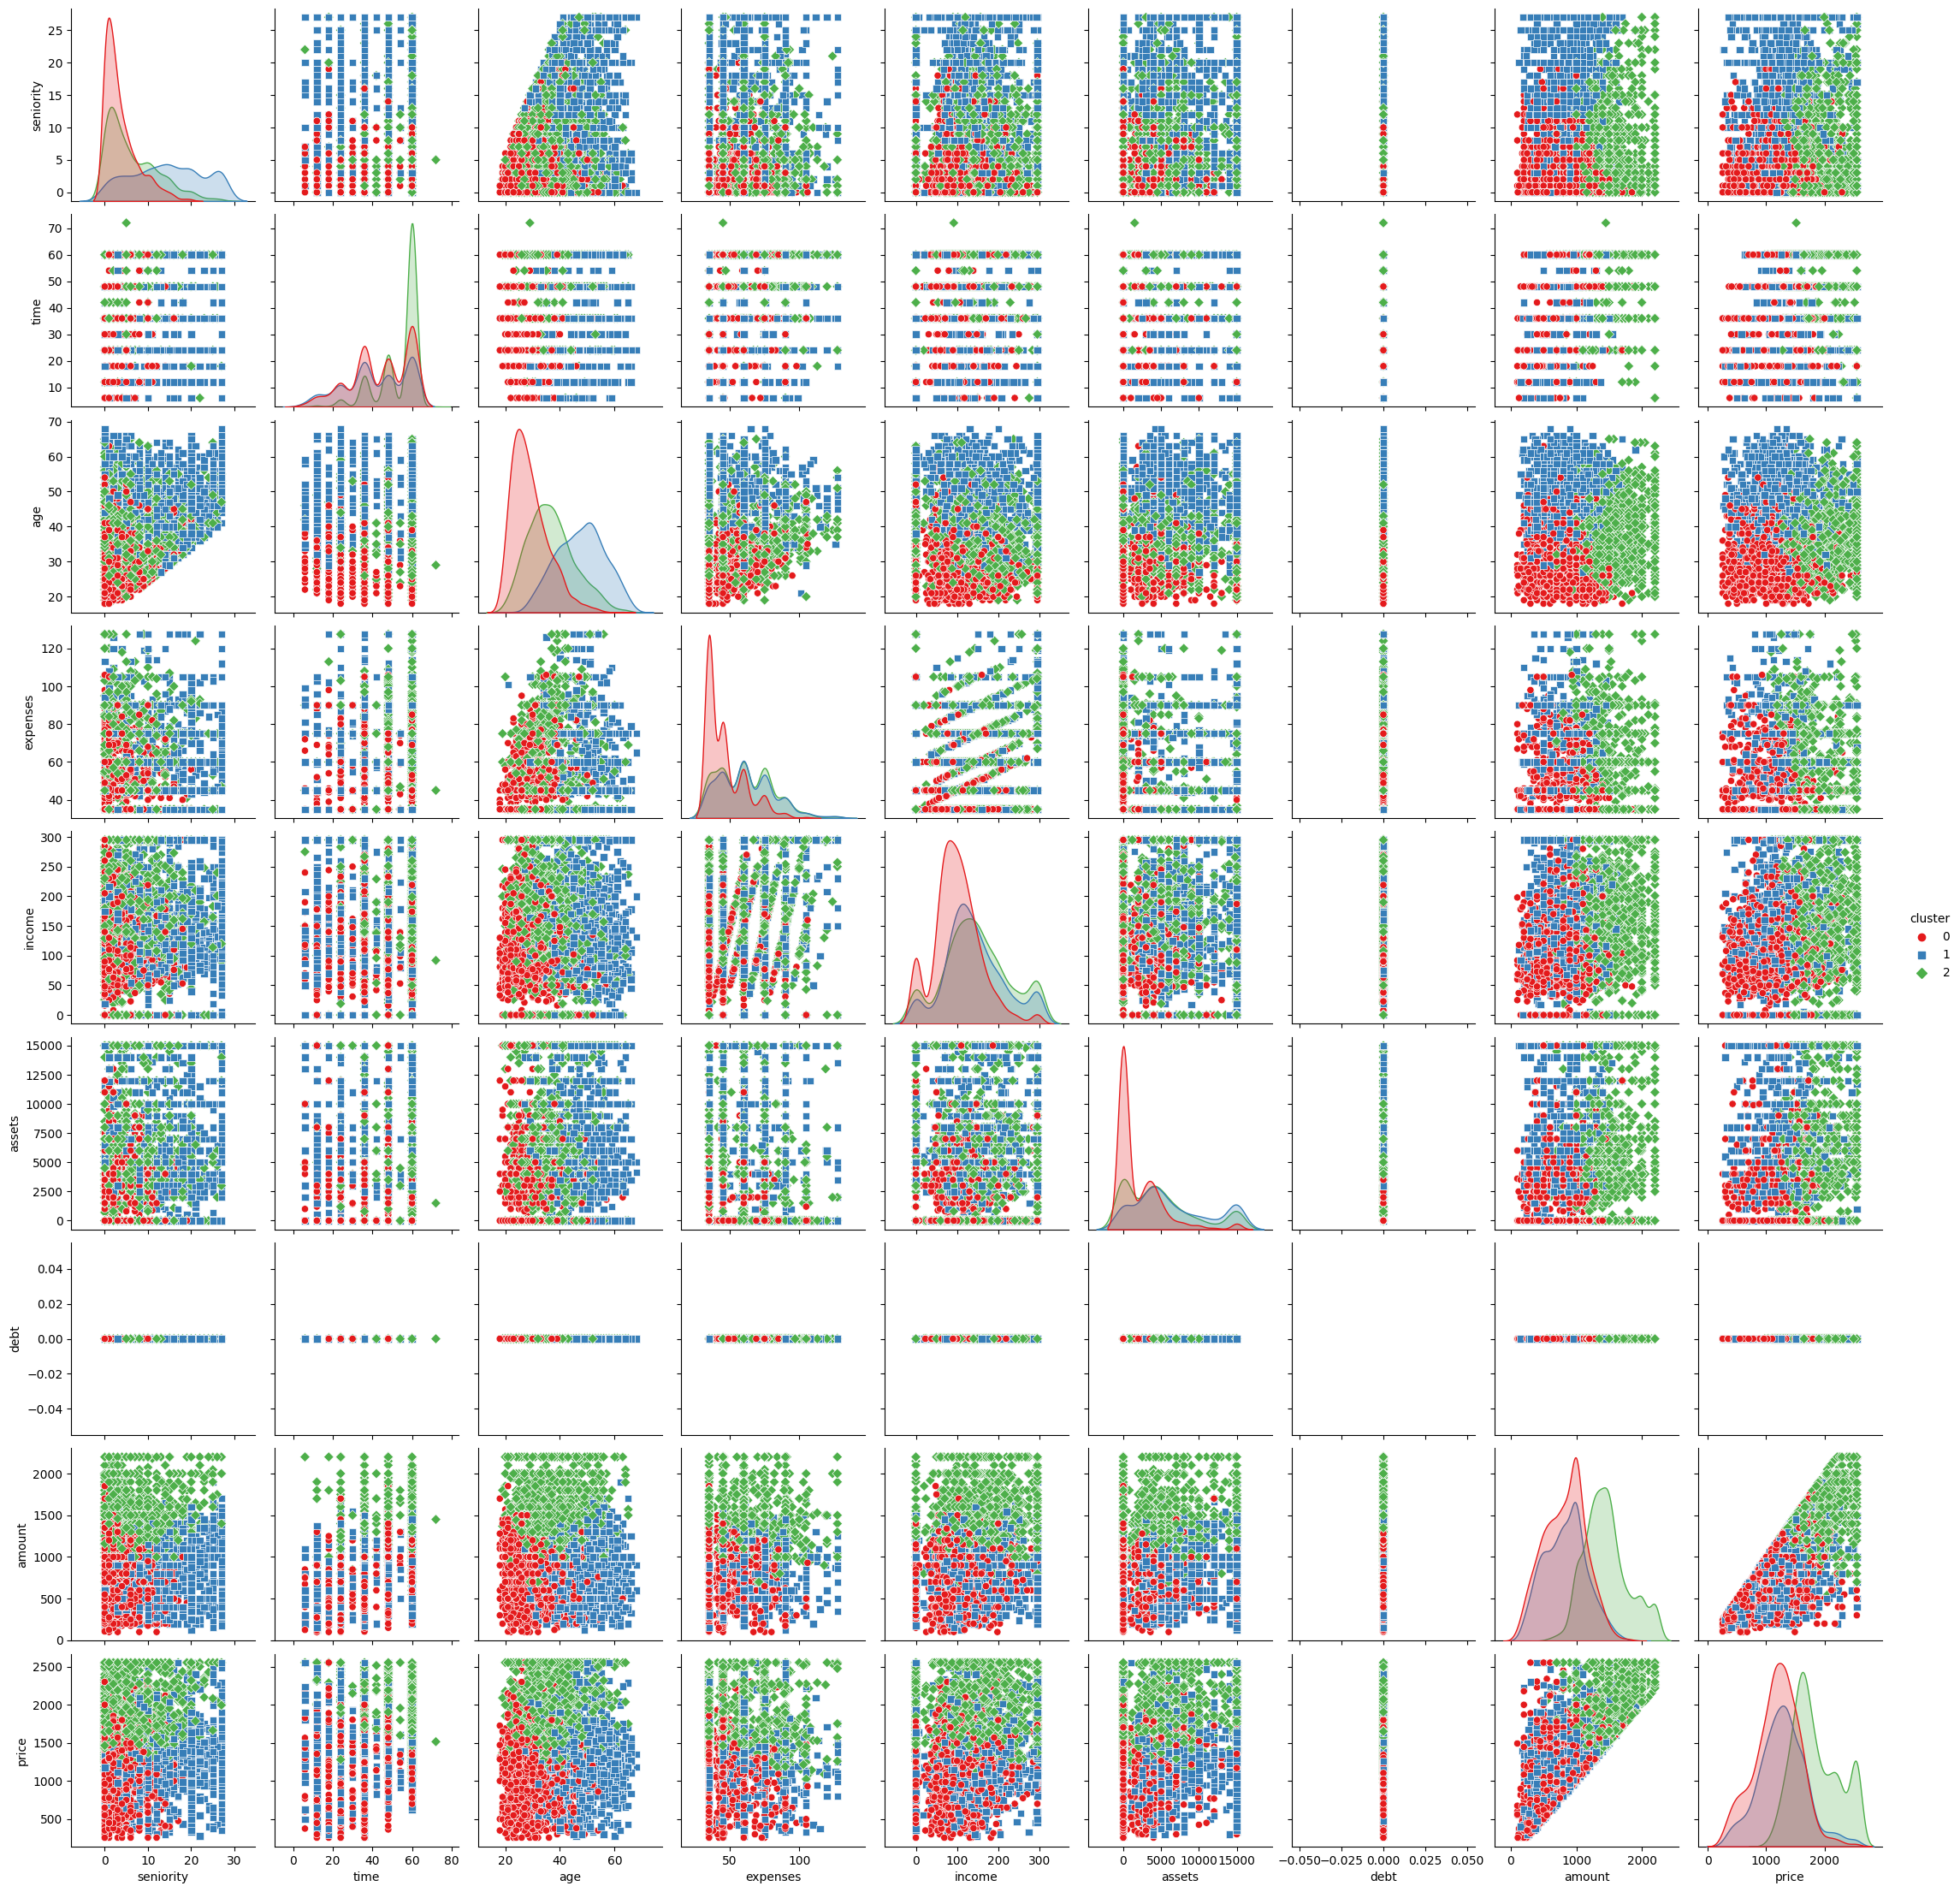

In [52]:
# Visualizar los clusters
sns.pairplot(df, hue='cluster', palette='Set1', markers=['o', 's', 'D'])
plt.show()

Interpret the Clusters

We can interpret the clusters and assign a credit_score based on the key characteristics.

In [54]:
# Interpretar los clusters
cluster_centers = kmeans.cluster_centers_
cluster_centers_df = pd.DataFrame(cluster_centers, columns=num_features + list(transformer.named_transformers_['categorical'].named_steps['encoder'].get_feature_names_out(cat_features)))

In [55]:
# Agregar el cluster al DataFrame original
df['cluster'] = kmeans.labels_

In [56]:
# Asignar un score de crédito basado en los clusters
# Aquí simplemente asignamos un score arbitrario para cada cluster
# En la práctica, esto debería basarse en un análisis más profundo de las características del cluster
cluster_score_map = {
    0: 'Bajo',
    1: 'Medio',
    2: 'Alto'
}
df['credit_score'] = df['cluster'].map(cluster_score_map)

print(df[['cluster', 'credit_score']])

      cluster credit_score
0           0         Bajo
1           1        Medio
2           2         Alto
3           0         Bajo
4           0         Bajo
...       ...          ...
4450        0         Bajo
4451        1        Medio
4452        0         Bajo
4453        0         Bajo
4454        2         Alto

[4455 rows x 2 columns]


In [57]:
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price,cluster,credit_score
0,ok,9.0,rent,60.0,30.0,married,no,freelance,73.0,129.0,0.0,0.0,800.0,846.00,0,Bajo
1,ok,17.0,rent,60.0,58.0,widow,no,fixed,48.0,131.0,0.0,0.0,1000.0,1658.00,1,Medio
2,default,10.0,owner,36.0,46.0,married,yes,freelance,90.0,200.0,3000.0,0.0,2000.0,2553.75,2,Alto
3,ok,0.0,rent,60.0,24.0,single,no,fixed,63.0,182.0,2500.0,0.0,900.0,1325.00,0,Bajo
4,ok,0.0,rent,36.0,26.0,single,no,fixed,46.0,107.0,0.0,0.0,310.0,910.00,0,Bajo
